In [167]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

data = pd.read_csv("vaccine_data_global.csv")
data

,Province_State,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
0,NaN,Afghanistan,12/16/2021,5.228706e+06,4.397449e+06,3.566192e+06,12/16/2021,4.0
1,NaN,Albania,12/16/2021,2.216402e+06,1.108572e+06,9.983260e+05,12/16/2021,8.0
2,NaN,Algeria,12/16/2021,1.229306e+07,6.875003e+06,5.391232e+06,12/16/2021,12.0
3,NaN,Andorra,12/16/2021,1.064280e+05,5.609500e+04,5.033300e+04,12/16/2021,20.0
4,NaN,Angola,12/16/2021,1.031955e+07,7.003795e+06,3.315757e+06,12/16/2021,24.0
...,...,...,...,...,...,...,...,...
627,NaN,West Bank and Gaza,12/16/2021,3.184868e+06,NaN,NaN,12/16/2021,275.0
628,NaN,World,12/16/2021,8.551439e+09,4.386355e+09,3.601249e+09,12/16/2021,NaN
629,NaN,Yemen,12/16/2021,7.860270e+05,5.566520e+05,3.665870e+05,12/16/2021,887.0
630,NaN,Zambia,12/16/2021,1.283096e+06,8.066110e+05,8.549790e+05,12/16/2021,894.0


In [168]:
df = data[data['Country_Region'].isin(["Australia","US","United Kingdom","New Zealand","Italy","Israel", "Brazil", "South Africa", "Vietnam"])]
df

,Province_State,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
32,NaN,Australia,12/16/2021,40688890.0,20249293.0,19375276.0,12/16/2021,36.0
33,Australian Capital Territory,Australia,12/16/2021,993517.0,NaN,NaN,12/16/2021,3601.0
34,New South Wales,Australia,12/16/2021,13194149.0,NaN,NaN,12/16/2021,3602.0
35,Northern Territory,Australia,12/16/2021,402806.0,NaN,NaN,12/16/2021,3603.0
36,Queensland,Australia,12/16/2021,7712811.0,NaN,NaN,12/16/2021,3604.0
37,South Australia,Australia,12/16/2021,2724109.0,NaN,NaN,12/16/2021,3605.0
38,Tasmania,Australia,12/16/2021,890683.0,NaN,NaN,12/16/2021,3606.0
39,Unknown,Australia,12/16/2021,0.0,NaN,NaN,12/16/2021,3609.0
40,Victoria,Australia,12/16/2021,10922708.0,NaN,NaN,12/16/2021,3607.0
41,Western Australia,Australia,12/16/2021,3848107.0,NaN,NaN,12/16/2021,3608.0


In [169]:
Country_Vaccination = pd.DataFrame(df.groupby('Country_Region')['People_fully_vaccinated'].agg('sum'))
Country_Vaccination.to_csv("Country Vaccination.csv")

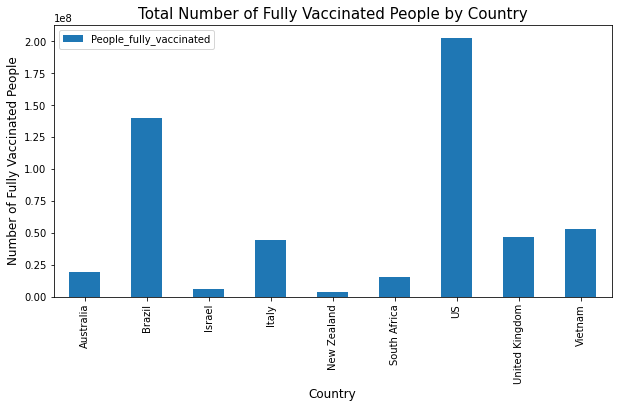

In [170]:
Bar_Pandas = Country_Vaccination.plot.bar(figsize=(10,5), rot=90)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Fully Vaccinated People", fontsize=12)
plt.title("Total Number of Fully Vaccinated People by Country", fontsize=15)
plt.savefig("Total Number of Fully Vaccinated People by Country.png")

In [171]:
world_pop = pd.read_csv("world_population.csv")
us_df = world_pop[world_pop["Country Name"] == "United States"]
us_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
251,United States,USA,"Population, total",SP.POP.TOTL,180671000.0,183691000.0,186538000.0,189242000.0,191889000.0,194303000.0,...,311583481.0,313877662.0,316059947.0,318386329.0,320738994.0,323071755.0,325122128.0,326838199.0,328329953.0,329484123.0


In [172]:
world_pop = pd.read_csv("world_population.csv")
world_df = world_pop[world_pop["Country Name"].isin(["Australia","United States","United Kingdom","New Zealand","Italy","Israel", "Brazil", "South Africa", "Vietnam"])]
world_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
13,Australia,AUS,"Population, total",SP.POP.TOTL,10276477.0,10483000.0,10742000.0,10950000.0,11167000.0,11388000.0,...,22340024.0,22733465.0,23128129.0,23475686.0,23815995.0,24190907.0,24601860.0,24982688.0,25365745.0,25687041.0
29,Brazil,BRA,"Population, total",SP.POP.TOTL,72179235.0,74311338.0,76514329.0,78772647.0,81064572.0,83373533.0,...,197514541.0,199287292.0,201035904.0,202763744.0,204471759.0,206163056.0,207833825.0,209469320.0,211049519.0,212559409.0
81,United Kingdom,GBR,"Population, total",SP.POP.TOTL,52400000.0,52800000.0,53250000.0,53650000.0,54000000.0,54348050.0,...,63258810.0,63700215.0,64128273.0,64602298.0,65116219.0,65611593.0,66058859.0,66460344.0,66836327.0,67215293.0
115,Israel,ISR,"Population, total",SP.POP.TOTL,2114020.0,2185000.0,2293000.0,2379000.0,2475000.0,2563000.0,...,7765800.0,7910500.0,8059500.0,8215700.0,8380100.0,8546000.0,8713300.0,8882800.0,9054000.0,9216900.0
116,Italy,ITA,"Population, total",SP.POP.TOTL,50199700.0,50536350.0,50879450.0,51252000.0,51675350.0,52112350.0,...,59379449.0,59539717.0,60233948.0,60789140.0,60730582.0,60627498.0,60536709.0,60421760.0,59729081.0,59554023.0
180,New Zealand,NZL,"Population, total",SP.POP.TOTL,2371800.0,2419700.0,2482000.0,2531800.0,2585400.0,2628400.0,...,4384000.0,4408100.0,4442100.0,4516500.0,4609400.0,4714100.0,4813600.0,4900600.0,4979300.0,5084300.0
251,United States,USA,"Population, total",SP.POP.TOTL,180671000.0,183691000.0,186538000.0,189242000.0,191889000.0,194303000.0,...,311583481.0,313877662.0,316059947.0,318386329.0,320738994.0,323071755.0,325122128.0,326838199.0,328329953.0,329484123.0
257,Vietnam,VNM,"Population, total",SP.POP.TOTL,32670048.0,33666111.0,34683410.0,35721213.0,36780001.0,37858947.0,...,88871384.0,89801926.0,90752593.0,91713850.0,92677082.0,93640435.0,94600643.0,95545959.0,96462108.0,97338583.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,52003759.0,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0


In [173]:
World_Pop1 = pd.DataFrame(world_df.groupby('Country Name')['2020'].agg('sum'))
World_Pop = World_Pop1.rename(columns={'2020': 'Population'},index={'United States': 'US'})
World_Pop

,Population
Country Name,
Australia,25687041.0
Brazil,212559409.0
Israel,9216900.0
Italy,59554023.0
New Zealand,5084300.0
South Africa,59308690.0
United Kingdom,67215293.0
US,329484123.0
Vietnam,97338583.0


In [174]:
frames = [Country_Vaccination, World_Pop]
df = pd.concat(frames, axis=1)
df['Percentage_Vacc'] = (df['People_fully_vaccinated'] / df['Population'])
df['Percentage_Vacc'] = df['Percentage_Vacc'].apply(lambda x: x*100)
df.style.format({'Percentage_Vacc': "{:.2%}"})
df.to_csv('Country Vaccination.csv', index=False)

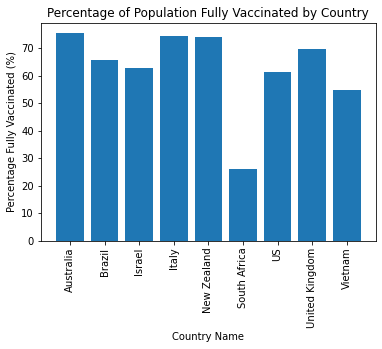

In [175]:
xaxis = ["Australia", "Brazil", "Israel", "Italy", "New Zealand", "South Africa", "US", "United Kingdom", "Vietnam"]
yaxis = df["Percentage_Vacc"]
plt.xticks(rotation=90)
ax = plt.bar(xaxis, yaxis)
plt.xlabel("Country Name")
plt.ylabel("Percentage Fully Vaccinated (%)")
plt.title("Percentage of Population Fully Vaccinated by Country")
plt.savefig("Percentage of Population Fully Vaccinated by Country.png")

#label = df['Percentage_Vacc']
#plt.annotate(
    #list(label),                      # Use `label` as label
    #(xaxis, yaxis),         # Place label at end of the bar
    #xytext=(5, 0),          # Horizontally shift label by `space`
    #textcoords="offset points", # Interpret `xytext` as offset in points
    #va='center',                # Vertically center label
    #ha='left') 




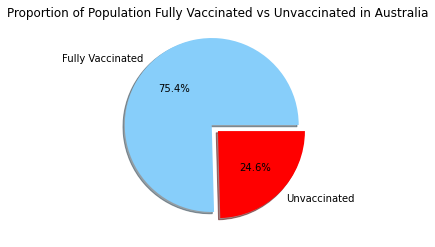

In [151]:
labels = ["Fully Vaccinated", "Unvaccinated"]
sizes = [19375276, (25687041-19375276)]
colors = ["lightskyblue", "red"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Proportion of Population Fully Vaccinated vs Unvaccinated in Australia")
plt.savefig("Proportion of Population Fully Vaccinated vs Unvaccinated in Australia.png")

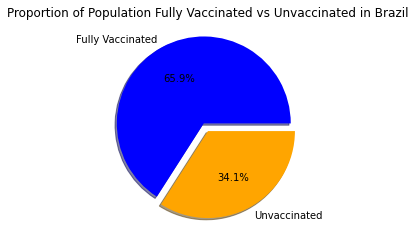

In [150]:
labels = ["Fully Vaccinated", "Unvaccinated"]
sizes = [140151965, (212559409-140151965)]
colors = ["blue", "orange"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Proportion of Population Fully Vaccinated vs Unvaccinated in Brazil")
plt.savefig("Proportion of Population Fully Vaccinated vs Unvaccinated in Brazil.png")

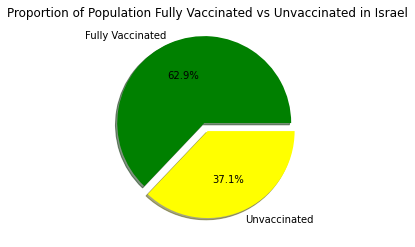

In [149]:
labels = ["Fully Vaccinated", "Unvaccinated"]
sizes = [5798867, (9216900-5798867)]
colors = ["green", "yellow"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Proportion of Population Fully Vaccinated vs Unvaccinated in Israel")
plt.savefig("Proportion of Population Fully Vaccinated vs Unvaccinated in Israel.png")

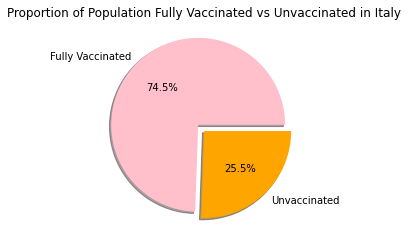

In [148]:
labels = ["Fully Vaccinated", "Unvaccinated"]
sizes = [44343143, (59554023-44343143)]
colors = ["pink", "orange"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Proportion of Population Fully Vaccinated vs Unvaccinated in Italy")
plt.savefig("Proportion of Population Fully Vaccinated vs Unvaccinated in Italy.png")

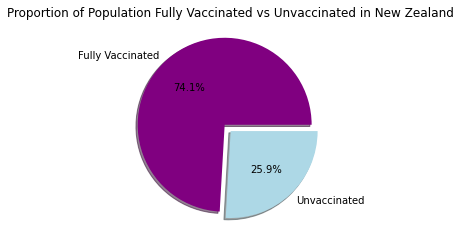

In [147]:
labels = ["Fully Vaccinated", "Unvaccinated"]
sizes = [3766864, (5084300-3766864)]
colors = ["purple", "lightblue"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Proportion of Population Fully Vaccinated vs Unvaccinated in New Zealand")
plt.savefig("Proportion of Population Fully Vaccinated vs Unvaccinated in New Zealand.png")

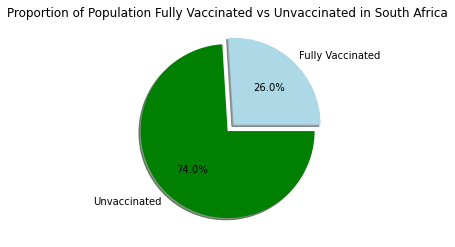

In [146]:
labels = ["Fully Vaccinated", "Unvaccinated"]
sizes = [15410168, (59308690-15410168)]
colors = ["lightblue", "green"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Proportion of Population Fully Vaccinated vs Unvaccinated in South Africa")
plt.savefig("Proportion of Population Fully Vaccinated vs Unvaccinated in South Africa.png")

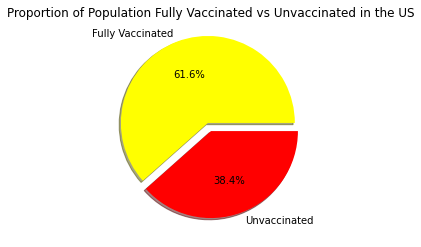

In [145]:
labels = ["Fully Vaccinated", "Unvaccinated"]
sizes = [202845886, (329484123-202845886)]
colors = ["yellow", "red"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Proportion of Population Fully Vaccinated vs Unvaccinated in the US")
plt.savefig("Proportion of Population Fully Vaccinated vs Unvaccinated in US.png")

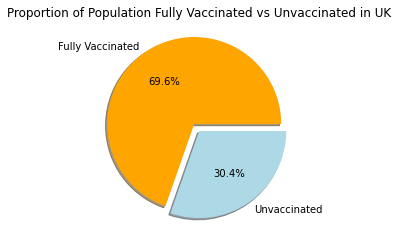

In [144]:
labels = ["Fully Vaccinated", "Unvaccinated"]
sizes = [46804609, (67215293-46804609)]
colors = ["orange", "lightblue"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Proportion of Population Fully Vaccinated vs Unvaccinated in UK")
plt.savefig("Proportion of Population Fully Vaccinated vs Unvaccinated in UK.png")

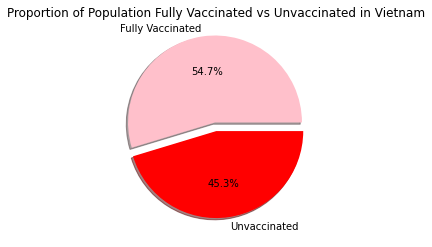

In [143]:
labels = ["Fully Vaccinated", "Unvaccinated"]
sizes = [53224715, (97338583-53224715)]
colors = ["pink", "red"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Proportion of Population Fully Vaccinated vs Unvaccinated in Vietnam")
plt.savefig("Proportion of Population Fully Vaccinated vs Unvaccinated in Vietnam.png")

In [36]:
death_df = pd.read_csv("Country Death.csv")
death_df.set_index("Country_Region", inplace = True)
death_df

,Deaths
Country_Region,
Australia,57020
Brazil,18342121
Israel,244472
Italy,3987145
New Zealand,1077
South Africa,2685302
US,22980649
United Kingdom,4304969
Vietnam,701736


In [177]:
df.to_csv("Percentage Vaccinated.csv")

In [41]:
frames = [death_df, df]
df1 = pd.concat(frames, axis=1)
df_clean = df1.loc[:,~df1.columns.duplicated()]
df_clean

,Deaths,People_fully_vaccinated,Population,Percentage_Vacc
Australia,57020,19375276.0,25687041.0,75.428213
Brazil,18342121,140151965.0,212559409.0,65.935432
Israel,244472,5798867.0,9216900.0,62.915590
Italy,3987145,44343143.0,59554023.0,74.458686
New Zealand,1077,3766864.0,5084300.0,74.088154
South Africa,2685302,15410168.0,59308690.0,25.982985
US,22980649,202845886.0,329484123.0,61.564692
United Kingdom,4304969,46804609.0,67215293.0,69.633869
Vietnam,701736,53224715.0,97338583.0,54.679977


In [50]:
df_clean['Percentage_Death'] = ((df_clean['Deaths'] / df_clean['Population'])*100 )
#df_clean['Percentage_Death'] = df_clean['Percentage_Death'].apply(lambda x: x*100)
#df_clean.style.format({'Percentage_Death': "{:.2%}"})
df_clean

,Deaths,People_fully_vaccinated,Population,Percentage_Vacc,Percentage_Death
Australia,57020,19375276.0,25687041.0,75.428213,0.221980
Brazil,18342121,140151965.0,212559409.0,65.935432,8.629174
Israel,244472,5798867.0,9216900.0,62.915590,2.652432
Italy,3987145,44343143.0,59554023.0,74.458686,6.695005
New Zealand,1077,3766864.0,5084300.0,74.088154,0.021183
South Africa,2685302,15410168.0,59308690.0,25.982985,4.527670
US,22980649,202845886.0,329484123.0,61.564692,6.974736
United Kingdom,4304969,46804609.0,67215293.0,69.633869,6.404746
Vietnam,701736,53224715.0,97338583.0,54.679977,0.720923


The r-squared value is: 0.004392785966535408
The correlation between Percentage of Population Death and Vaccinated is: -0.06627809567674231


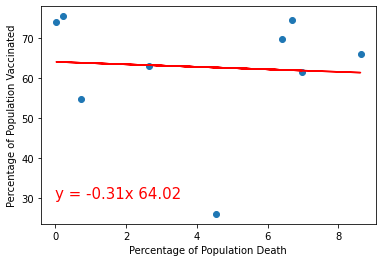

In [142]:
x_axis = df_clean["Percentage_Death"]
y_axis = df_clean["Percentage_Vacc"]
plt.xlabel("Percentage of Population Death")
plt.ylabel("Percentage of Population Vaccinated")
plt.scatter(x_axis, y_axis, marker="o")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
print(f"The r-squared value is: {rvalue**2}")
print(f"The correlation between Percentage of Population Death and Vaccinated is: {rvalue}")

In [63]:
Country_Vaccination1 = pd.DataFrame(data.groupby('Country_Region')['People_fully_vaccinated'].agg('sum'))
Country_Vaccination1

,People_fully_vaccinated
Country_Region,
Afghanistan,3.566192e+06
Albania,9.983260e+05
Algeria,5.391232e+06
Andorra,5.033300e+04
Angola,3.315757e+06
...,...
West Bank and Gaza,0.000000e+00
World,3.601249e+09
Yemen,3.665870e+05


In [121]:
world_pop
#world_pop.set_index("Country Name", inplace = True)

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,...,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0
"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,5816241.0,...,23807586.0,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0
South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,19888259.0,...,52003759.0,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0


In [124]:
frames = [world_pop, Country_Vaccination1]
World_Pop_Vacc = pd.concat(frames, axis=1)
World = World_Pop_Vacc.dropna()
World

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,People_fully_vaccinated
Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,3566192.0
Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,3315757.0
Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,...,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837743.0,998326.0
Andorra,AND,"Population, total",SP.POP.TOTL,13410.0,14378.0,15379.0,16407.0,17466.0,18542.0,19646.0,...,82427.0,80770.0,79213.0,77993.0,77295.0,76997.0,77008.0,77146.0,77265.0,50333.0
United Arab Emirates,ARE,"Population, total",SP.POP.TOTL,92417.0,100801.0,112112.0,125130.0,138049.0,149855.0,159979.0,...,9141598.0,9197908.0,9214182.0,9262896.0,9360975.0,9487206.0,9630966.0,9770526.0,9890400.0,9020082.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,WSM,"Population, total",SP.POP.TOTL,108627.0,112112.0,115768.0,119552.0,123346.0,127055.0,130672.0,...,189089.0,190712.0,192220.0,193510.0,194540.0,195358.0,196128.0,197093.0,198410.0,121539.0
Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0,773633.0
South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,19888259.0,...,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0,15410168.0
Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,3681953.0,...,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0,854979.0


In [130]:
World['Percentage_Vacc'] = ((World['People_fully_vaccinated'] / World['2020'])*100 )
World

<ipython-input-130-56396abac6c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  World['Percentage_Vacc'] = ((World['People_fully_vaccinated'] / World['2020'])*100 )


,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,2020,People_fully_vaccinated,Percentage_Vacc
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,...,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,3566192.0,9.160914
Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,...,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,3315757.0,10.088633
Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,...,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837743.0,998326.0,35.180282
Andorra,AND,"Population, total",SP.POP.TOTL,13410.0,14378.0,15379.0,16407.0,17466.0,18542.0,19646.0,...,80770.0,79213.0,77993.0,77295.0,76997.0,77008.0,77146.0,77265.0,50333.0,65.143338
United Arab Emirates,ARE,"Population, total",SP.POP.TOTL,92417.0,100801.0,112112.0,125130.0,138049.0,149855.0,159979.0,...,9197908.0,9214182.0,9262896.0,9360975.0,9487206.0,9630966.0,9770526.0,9890400.0,9020082.0,91.200376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,WSM,"Population, total",SP.POP.TOTL,108627.0,112112.0,115768.0,119552.0,123346.0,127055.0,130672.0,...,190712.0,192220.0,193510.0,194540.0,195358.0,196128.0,197093.0,198410.0,121539.0,61.256489
Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0,773633.0,43.575678
South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,19888259.0,...,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0,15410168.0,25.982985


In [131]:
World.index.name = 'Country Name'
World
Percentage_Vaccinated = pd.DataFrame(World.groupby('Country Name')['Percentage_Vacc'].agg('sum'))
Percentage_Vaccinated

,Percentage_Vacc
Country Name,
Afghanistan,9.160914
Albania,35.180282
Algeria,12.294421
Andorra,65.143338
Angola,10.088633
...,...
Vanuatu,15.414293
Vietnam,54.679977
World,46.450705


In [132]:
data = pd.read_csv("Analysis1.csv")
World_Death = pd.DataFrame(data.groupby('Country_Region')['Deaths'].agg('sum'))
World_Death

,Deaths
Country_Region,
Afghanistan,211585
Albania,87328
Algeria,173859
Andorra,3777
Angola,50068
...,...
Vietnam,701736
West Bank and Gaza,142476
Yemen,57757


In [133]:
frames = [World_Death, Percentage_Vaccinated]
World_Population_Vacc = pd.concat(frames, axis=1)
World_total = World_Population_Vacc.dropna()
World_total

,Deaths,Percentage_Vacc
Afghanistan,211585.0,9.160914
Albania,87328.0,35.180282
Algeria,173859.0,12.294421
Andorra,3777.0,65.143338
Angola,50068.0,10.088633
...,...,...
Uzbekistan,40848.0,17.182979
Vanuatu,30.0,15.414293
Vietnam,701736.0,54.679977
Zambia,109952.0,4.650680


In [178]:
frames = [World_Death, World]
World_Population_Vacc1 = pd.concat(frames, axis=1)
World_total1 = World_Population_Vacc1.dropna()
World_total1.to_csv("World Vaccinated.csv")

In [156]:
World_total1['Percentage_Deaths'] = ((World_total1['Deaths'] / World_total1['2020'])*100 )
World_total1

<ipython-input-156-62d16410e1bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  World_total1['Percentage_Deaths'] = ((World_total1['Deaths'] / World_total1['2020'])*100 )


,Deaths,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,People_fully_vaccinated,Percentage_Vacc,Percentage_Death,Percentage_Deaths
Afghanistan,211585.0,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,3566192.0,9.160914,0.543524,0.543524
Albania,87328.0,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837743.0,998326.0,35.180282,3.077375,3.077375
Algeria,173859.0,DZA,"Population, total",SP.POP.TOTL,11057864.0,11336336.0,11619828.0,11912800.0,12221675.0,12550880.0,...,39728020.0,40551398.0,41389174.0,42228415.0,43053054.0,43851043.0,5391232.0,12.294421,0.396476,0.396476
Andorra,3777.0,AND,"Population, total",SP.POP.TOTL,13410.0,14378.0,15379.0,16407.0,17466.0,18542.0,...,77993.0,77295.0,76997.0,77008.0,77146.0,77265.0,50333.0,65.143338,4.888371,4.888371
Angola,50068.0,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,3315757.0,10.088633,0.152339,0.152339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,40848.0,UZB,"Population, total",SP.POP.TOTL,8526299.0,8813619.0,9113629.0,9428906.0,9762819.0,10116870.0,...,31298900.0,31847900.0,32388600.0,32956100.0,33580350.0,34232050.0,5882086.0,17.182979,0.119327,0.119327
Vanuatu,30.0,VUT,"Population, total",SP.POP.TOTL,63689.0,65700.0,67793.0,69944.0,72116.0,74268.0,...,271128.0,278326.0,285499.0,292675.0,299882.0,307150.0,47345.0,15.414293,0.009767,0.009767
Vietnam,701736.0,VNM,"Population, total",SP.POP.TOTL,32670048.0,33666111.0,34683410.0,35721213.0,36780001.0,37858947.0,...,92677082.0,93640435.0,94600643.0,95545959.0,96462108.0,97338583.0,53224715.0,54.679977,0.720923,0.720923
Zambia,109952.0,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0,854979.0,4.650680,0.598087,0.598087


In [138]:
World_Population_Vaccination = World_total1[["Percentage_Vacc", "Percentage_Deaths"]]
World_Population_Vaccination.to_csv('World Population Vaccination.csv')

The r-squared value is: 0.1239225647014753
The correlation between the Percentage of Deaths and Population Vaccinated is: 0.35202636932689474


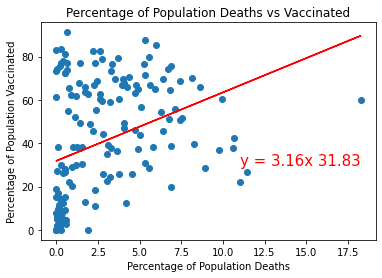

In [155]:
x_axis = World_Population_Vaccination["Percentage_Deaths"]
y_axis = World_Population_Vaccination["Percentage_Vacc"]
plt.xlabel("Percentage of Population Deaths")
plt.ylabel("Percentage of Population Vaccinated")
plt.title("Percentage of Population Deaths vs Vaccinated")
plt.scatter(x_axis, y_axis, marker="o")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(11,30),fontsize=15,color="red")
print(f"The r-squared value is: {rvalue**2}")
print(f"The correlation between the Percentage of Deaths and Population Vaccinated is: {rvalue}")
plt.savefig("Percentage of Population Deaths vs Vaccinated.png")